## Desafio 1

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text 

In [34]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [35]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [36]:
engine = create_engine('sqlite:///:memory:')

In [37]:
itens_pedidos.to_sql('itens_pedidos', engine, index = False)
pedidos.to_sql('pedidos', engine, index = False)
produtos.to_sql('produtos', engine, index = False)
vendedores.to_sql('vendedores', engine, index = False)

5

In [38]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


In [39]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados, columns = consulta.keys())

In [40]:
df_itens_pedidos = sql_df('SELECT VALOR_TOTAL FROM ITENS_PEDIDOS')
receita = df_itens_pedidos['valor_total'].sum()
receita

45803930

In [41]:
query = '''SELECT SUM(VALOR_TOTAL) AS RECEITA
FROM ITENS_PEDIDOS;
'''
sql_df(query)

,RECEITA
0,45803930


## Desafio 2

In [42]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS pedidos
FROM ITENS_PEDIDOS, PRODUTOS
WHERE ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.MARCA
ORDER BY pedidos ASC;
'''
df_marcas = sql_df(query)
df_marcas

,marca,pedidos
0,Talie Nk,94
1,Track & Field,96
2,Ateliê de Calças,99
3,Bottega Veneta,101
4,Bcbgmaxzria,103
...,...,...
112,Banana Republic,584
113,Le Lis Blanc,715
114,Animale,1128
115,Mixed,1673


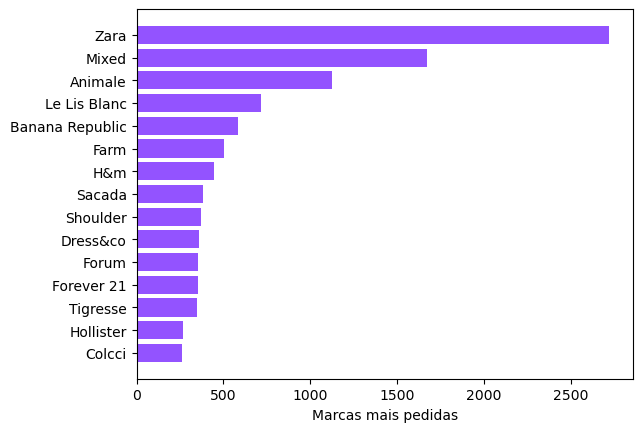

In [43]:
plt.barh(df_marcas['marca'][-15:], df_marcas['pedidos'][-15:], color = '#9353FF')
plt.xlabel('Marcas mais pedidas')
plt.show()

## Desafio 3

In [52]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM PEDIDOS, PRODUTOS
WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10;
'''
sql_df(query)

,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


## Desafio 4

In [56]:
query = '''SELECT strftime('%m', data_compra) AS mes, SUM(total) AS receita
FROM PEDIDOS
WHERE strftime('%Y', data_compra) = '2021'
GROUP BY mes;
'''

vendas_21 = sql_df(query)
vendas_21

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


## Desafio 5

In [59]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS quantidade_vendas
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY quantidade_vendas DESC;
'''

sql_df(query)

,marca,quantidade_vendas
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


## Desafio 6

In [65]:
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS quantidade_vendas
FROM ITENS_PEDIDOS
JOIN PRODUTOS ON PRODUTOS.PRODUTO_ID = ITENS_PEDIDOS.PRODUTO_ID 
JOIN PEDIDOS ON PEDIDOS.PEDIDO_ID = ITENS_PEDIDOS.PEDIDO_ID
WHERE strftime('%m', data_compra) = '12'
GROUP BY produtos.produto
ORDER BY quantidade_vendas DESC
'''

sql_df(query)

,produto,quantidade_vendas
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5
